# Stock Market Analysis

- Analyse stock data related to Tesla, Ford and General Motors(GM), from Jan 1st 2012 to
Jan 1 2017. 
- This project is used to practice my skills with matplotlib, pandas and numpy


#### Import

In [64]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime 

mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('bmh')
# Magic function which allows matplotlib graphs to be included in the notebook, next to the code 
%matplotlib inline

#### Reading Data

In [65]:
tesla = pd.read_csv('Tesla_Stock.csv',index_col = 'Date', parse_dates = True)
ford = pd.read_csv('Ford_Stock.csv',index_col = 'Date', parse_dates = True)
gm  = pd.read_csv('GM_Stock.csv',index_col = 'Date', parse_dates = True)

#### Visualising the data

##### Open Price

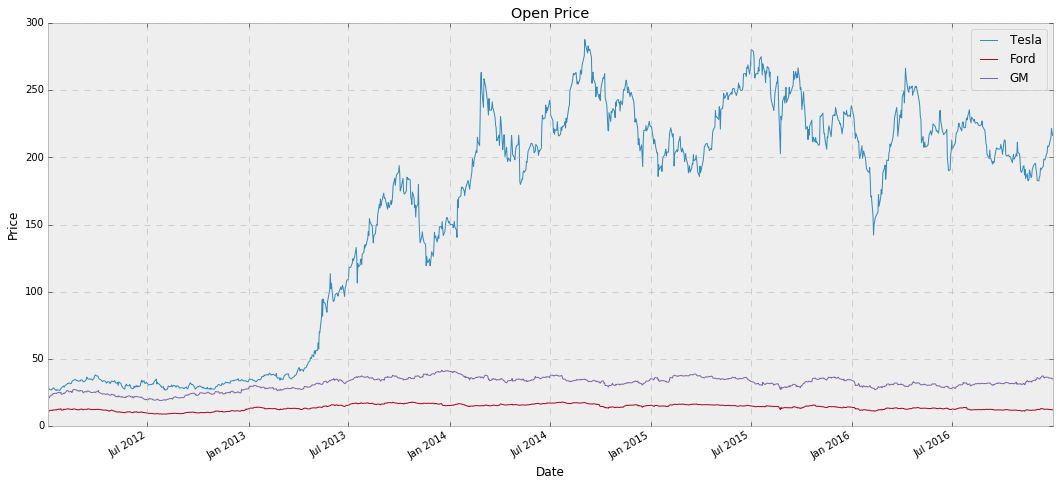

In [66]:
ax = tesla['Open'].plot(label = 'Tesla',figsize=(18,8),lw = 1, title = 'Open Price')
ford['Open'].plot(label = 'Ford', lw = 1)
gm['Open'].plot(label = 'GM', lw = 1)
ax.set_ylabel("Price")

plt.legend();

##### Volume Traded

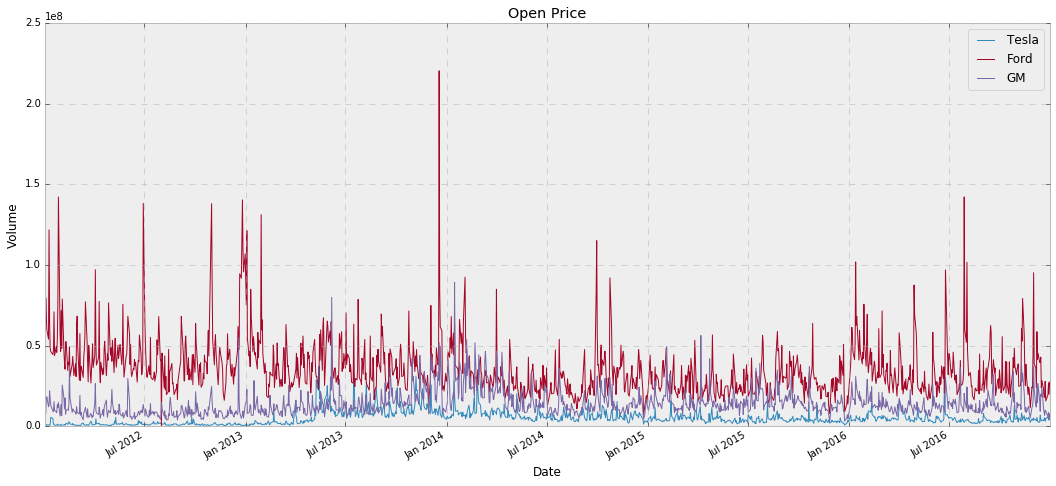

In [68]:
ax = tesla['Volume'].plot(label = 'Tesla',figsize=(18,8), lw = 1, title = 'Open Price')
ford['Volume'].plot(label = 'Ford', lw = 1)
gm['Volume'].plot(label = 'GM', lw = 1)
ax.set_ylabel("Volume")
plt.legend();

 - Using: ford['Volume'].idxmax() = Timestamp('2013-12-18 00:00:00')
 - We see a large spike on this date due to Ford announcing a profit warning that said the cost of launching new products would cut into the next year's profits which in turn caused a big sell off of their stock
        